In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression
import tensorflow as tf

In [42]:
# Import our input dataset
salary_df = pd.read_csv('ds_salaries.csv')
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [43]:
engineer = 'Engineer'
analyst = 'Analyst'
scientist = 'Scientist'

for idx, x in enumerate(salary_df["job_title"]):
    if engineer in x:
        salary_df.at[idx, "job_title"] = "Data Engineer"
    elif analyst in x:
        salary_df.at[idx, "job_title"] = "Data Analyst"
    elif scientist in x:
        salary_df.at[idx, "job_title"] = "Data Scientist"
    else:
        salary_df.at[idx, "job_title"] = "Other"
salary_df["job_title"]

0       Data Scientist
1        Data Engineer
2        Data Engineer
3       Data Scientist
4       Data Scientist
             ...      
3750    Data Scientist
3751    Data Scientist
3752    Data Scientist
3753      Data Analyst
3754             Other
Name: job_title, Length: 3755, dtype: object

In [44]:
salary_df["job_title"].nunique()

4

In [45]:
salary_df.drop(salary_df[["salary", "salary_currency", "company_location"]], axis = 1, inplace=True)
salary_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size
0,2023,SE,FT,Data Scientist,85847,ES,100,L
1,2023,MI,CT,Data Engineer,30000,US,100,S
2,2023,MI,CT,Data Engineer,25500,US,100,S
3,2023,SE,FT,Data Scientist,175000,CA,100,M
4,2023,SE,FT,Data Scientist,120000,CA,100,M


In [46]:
country_cat = []
for x in salary_df["employee_residence"]:
    if x == "US":
        country_cat.append("US")
    else:
        country_cat.append("other")
country_cat

['other',
 'US',
 'US',
 'other',
 'other',
 'US',
 'US',
 'other',
 'other',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'other',
 'other',
 'other',
 'other',
 'US',
 'US',
 'US',
 'US',
 'other',
 'other',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'other',
 'other',
 'other',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'other',
 'other',
 'other',
 'other',
 'other',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'other',
 'other',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'other',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'U

In [47]:
salary_df["country_cat"]= country_cat
salary_df.drop("employee_residence", axis = 1, inplace=True)

In [48]:
salary_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,country_cat
0,2023,SE,FT,Data Scientist,85847,100,L,other
1,2023,MI,CT,Data Engineer,30000,100,S,US
2,2023,MI,CT,Data Engineer,25500,100,S,US
3,2023,SE,FT,Data Scientist,175000,100,M,other
4,2023,SE,FT,Data Scientist,120000,100,M,other


In [49]:
ft_salary_df = salary_df.loc[salary_df["employment_type"] == "FT"]
ft_salary_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,country_cat
0,2023,SE,FT,Data Scientist,85847,100,L,other
3,2023,SE,FT,Data Scientist,175000,100,M,other
4,2023,SE,FT,Data Scientist,120000,100,M,other
5,2023,SE,FT,Data Scientist,222200,0,L,US
6,2023,SE,FT,Data Scientist,136000,0,L,US
...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Other,165000,100,L,US
3750,2020,SE,FT,Data Scientist,412000,100,L,US
3751,2021,MI,FT,Data Scientist,151000,100,L,US
3752,2020,EN,FT,Data Scientist,105000,100,S,US


In [50]:
salary_df_22_23 = ft_salary_df.loc[ft_salary_df["work_year"] >= 2022]
salary_df_22_23

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,country_cat
0,2023,SE,FT,Data Scientist,85847,100,L,other
3,2023,SE,FT,Data Scientist,175000,100,M,other
4,2023,SE,FT,Data Scientist,120000,100,M,other
5,2023,SE,FT,Data Scientist,222200,0,L,US
6,2023,SE,FT,Data Scientist,136000,0,L,US
...,...,...,...,...,...,...,...,...
3486,2022,EN,FT,Data Analyst,100000,50,L,US
3490,2022,EN,FT,Data Engineer,120000,100,M,US
3491,2022,SE,FT,Data Engineer,84053,0,M,other
3493,2022,EN,FT,Data Engineer,125000,0,M,US


In [51]:
salary_df_22_23.nunique()

work_year             2
experience_level      4
employment_type       1
job_title             4
salary_in_usd       872
remote_ratio          3
company_size          3
country_cat           2
dtype: int64

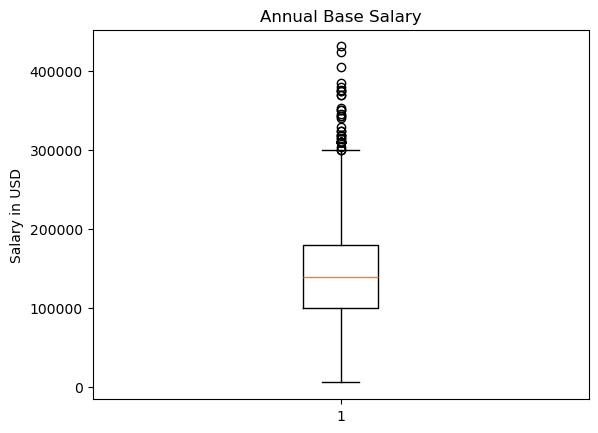

In [52]:
import matplotlib.pyplot as plt
import numpy as np

fig1, ax1 = plt.subplots()
ax1.set_title('Annual Base Salary')
ax1.set_ylabel('Salary in USD')
ax1.boxplot(salary_df_22_23["salary_in_usd"])
plt.show()

In [53]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = salary_df_22_23["salary_in_usd"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of salaries is: {lowerq}")
print(f"The upper quartile of salaries is: {upperq}")
print(f"The interquartile range of salaries is: {iqr}")
print(f"The the median of salaries is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of salaries is: 100000.0
The upper quartile of salaries is: 180000.0
The interquartile range of salaries is: 80000.0
The the median of salaries is: 139000.0 
Values below -20000.0 could be outliers.
Values above 300000.0 could be outliers.


In [54]:
salary_df_cleaned = salary_df_22_23.loc[(salary_df_22_23["salary_in_usd"] <= 300000.0)]

In [55]:
print(salary_df_cleaned["salary_in_usd"].max())
print(salary_df_cleaned["salary_in_usd"].median())
print(salary_df_cleaned["salary_in_usd"].min())

300000
137750.0
5132


In [56]:
salary_df_cleaned.drop("employment_type", axis = 1, inplace=True)
salary_df_cleaned.head()

C:\Users\emmar\AppData\Local\Temp\ipykernel_2424\3356660688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df_cleaned.drop("employment_type", axis = 1, inplace=True)


,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_size,country_cat
0,2023,SE,Data Scientist,85847,100,L,other
3,2023,SE,Data Scientist,175000,100,M,other
4,2023,SE,Data Scientist,120000,100,M,other
5,2023,SE,Data Scientist,222200,0,L,US
6,2023,SE,Data Scientist,136000,0,L,US


In [57]:
salary_df_cleaned.dtypes

work_year            int64
experience_level    object
job_title           object
salary_in_usd        int64
remote_ratio         int64
company_size        object
country_cat         object
dtype: object

In [58]:
salary_df_cleaned["remote_ratio"].value_counts()

remote_ratio
0      1854
100    1453
50       85
Name: count, dtype: int64

In [59]:
salary_df_cleaned["work_year"] = salary_df_cleaned["work_year"].astype(str)
salary_df_cleaned["remote_ratio"] = salary_df_cleaned["remote_ratio"].astype(str)
salary_df_cleaned.dtypes

C:\Users\emmar\AppData\Local\Temp\ipykernel_2424\435332097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df_cleaned["work_year"] = salary_df_cleaned["work_year"].astype(str)
C:\Users\emmar\AppData\Local\Temp\ipykernel_2424\435332097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df_cleaned["remote_ratio"] = salary_df_cleaned["remote_ratio"].astype(str)


work_year           object
experience_level    object
job_title           object
salary_in_usd        int64
remote_ratio        object
company_size        object
country_cat         object
dtype: object

In [60]:
salary_df_cleaned

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_size,country_cat
0,2023,SE,Data Scientist,85847,100,L,other
3,2023,SE,Data Scientist,175000,100,M,other
4,2023,SE,Data Scientist,120000,100,M,other
5,2023,SE,Data Scientist,222200,0,L,US
6,2023,SE,Data Scientist,136000,0,L,US
...,...,...,...,...,...,...,...
3486,2022,EN,Data Analyst,100000,50,L,US
3490,2022,EN,Data Engineer,120000,100,M,US
3491,2022,SE,Data Engineer,84053,0,M,other
3493,2022,EN,Data Engineer,125000,0,M,US


In [61]:
salary_df_cleaned.count()

work_year           3392
experience_level    3392
job_title           3392
salary_in_usd       3392
remote_ratio        3392
company_size        3392
country_cat         3392
dtype: int64

In [62]:
salary_df_cleaned = salary_df_cleaned.dropna(how="any")
salary_df_cleaned

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_size,country_cat
0,2023,SE,Data Scientist,85847,100,L,other
3,2023,SE,Data Scientist,175000,100,M,other
4,2023,SE,Data Scientist,120000,100,M,other
5,2023,SE,Data Scientist,222200,0,L,US
6,2023,SE,Data Scientist,136000,0,L,US
...,...,...,...,...,...,...,...
3486,2022,EN,Data Analyst,100000,50,L,US
3490,2022,EN,Data Engineer,120000,100,M,US
3491,2022,SE,Data Engineer,84053,0,M,other
3493,2022,EN,Data Engineer,125000,0,M,US


In [63]:
salary_range = []
for idx, x in enumerate(salary_df_cleaned["salary_in_usd"]):
    if x < 136994:
        salary_range.append(0)      
    else:
        salary_range.append(1)  
salary_range

[0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,


In [64]:
salary_df_cleaned["salary_range"] = salary_range
salary_df_cleaned.head()

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_size,country_cat,salary_range
0,2023,SE,Data Scientist,85847,100,L,other,0
3,2023,SE,Data Scientist,175000,100,M,other,1
4,2023,SE,Data Scientist,120000,100,M,other,0
5,2023,SE,Data Scientist,222200,0,L,US,1
6,2023,SE,Data Scientist,136000,0,L,US,0


In [65]:
# Split target column from dataset
y = salary_df_cleaned["salary_range"]
X = salary_df_cleaned.drop(columns=['salary_in_usd', 'salary_range'])

In [66]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X, dtype=int)

In [67]:
# Preview the data
X.head()

,work_year_2022,work_year_2023,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Data Analyst,job_title_Data Engineer,job_title_Data Scientist,job_title_Other,remote_ratio_0,remote_ratio_100,remote_ratio_50,company_size_L,company_size_M,company_size_S,country_cat_US,country_cat_other
0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
3,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
5,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0
6,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0


In [68]:
y[:5]

0    0
3    1
4    0
5    1
6    0
Name: salary_range, dtype: int64

In [69]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [70]:
X_train.shape

(2544, 18)

In [71]:
X_test.shape

(848, 18)

In [72]:
 # Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [88]:
 # Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
# Instantiate the model with k = 3 neighbors
model = KNeighborsClassifier(n_neighbors=7)

In [89]:
 # Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [90]:
 # Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,

In [91]:
 # Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[262, 113],
       [150, 323]], dtype=int64)

In [92]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       375
           1       0.74      0.68      0.71       473

    accuracy                           0.69       848
   macro avg       0.69      0.69      0.69       848
weighted avg       0.69      0.69      0.69       848



In [ ]:
#Create a random Forest

In [ ]:
salary_rf = salary_df_cleaned.copy()
salary_rf

In [ ]:
salary_rf = salary_rf.dropna(how="any")
salary_rf

In [95]:
# Define features set
X = salary_df_cleaned.copy()
X.drop(["salary_range", "salary_in_usd"], axis=1, inplace=True)
X.head()

,work_year,experience_level,job_title,remote_ratio,company_size,country_cat
0,2023,SE,Data Scientist,100,L,other
3,2023,SE,Data Scientist,100,M,other
4,2023,SE,Data Scientist,100,M,other
5,2023,SE,Data Scientist,0,L,US
6,2023,SE,Data Scientist,0,L,US


In [100]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X, dtype=int)

In [101]:
 # Define target vector
y = salary_df_cleaned["salary_range"].ravel()
y[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [102]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [103]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [104]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [105]:
 # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [106]:
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [107]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [108]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [109]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [110]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,251,177
Actual 1,78,342


Accuracy Score : 0.6992924528301887
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.59      0.66       428
           1       0.66      0.81      0.73       420

    accuracy                           0.70       848
   macro avg       0.71      0.70      0.70       848
weighted avg       0.71      0.70      0.70       848

